# Visualization of I-V curves using parameters obtained by interval B&B

In [1]:
using Plots, Plots.Measures
using CSV, Tables
using Printf

In [2]:
# directory to store images and to get measurement data
const img_dir = raw"./img";
const data_dir = raw"../DE/src/data"
include("../DE/src/models.jl")

calculate_rmse

## RTC France with B&B

In [3]:
data_RT = CSV.File(joinpath(data_dir, "RTFrance.csv")) |> Tables.matrix;
T = 33 + 273.15;  # temperature in Kalvin

- SDM

In [4]:
# refer to Table I 
Iph = 0.760779120136
I0 = 0.322873926858
n = 1.48113747635
Rs = 0.0363792207867
Rp = 53.7009537057

rmse_sdm = calculate_rmse(data_RT, [Iph, I0, n, Rs, Rp], T)
@printf("RTC France SDM RMSE = %10.6e", rmse_sdm)

RTC France SDM RMSE = 9.860250e-04

In [5]:
# calculate model output
I_RT_SDM = [model_sdm(V, I, Iph, I0, n, Rs, Rp, T) for (V, I) in eachrow(data_RT)];

- DDM

In [6]:
# refer to Table II
Iph = 0.760815738919
I01 = 0.217867184041
I02 = 0.78145499533
n1 = 1.44827388213
n2 = 1.9818316676
Rs = 0.0367359827333
Rp = 55.8931982861

rmse_ddm = calculate_rmse(data_RT, [Iph, I01, I02, n1, n2, Rs, Rp], T)
@printf("RTC France DDM RMSE = %.10e", rmse_ddm)

RTC France DDM RMSE = 9.8358187587e-04

In [7]:
# calculate model output
I_RT_DDM = [model_ddm(V, I, Iph, I01, I02, n1, n2, Rs, Rp, T) for (V, I) in eachrow(data_RT)];

- Plot

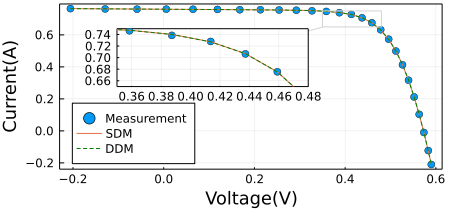

In [8]:
using Base: Bottom
p_RT = plot(size=(450, 210), guidefontsize=12, legendfontsize=8)
plot!(p_RT, data_RT[:, 1], data_RT[:, 2]; st=:scatter, label="Measurement");
plot!(p_RT, data_RT[:, 1], I_RT_SDM; label="SDM")
plot!(p_RT, data_RT[:, 1], I_RT_DDM; label="DDM", linestyle=:dash, linecolor=:green)
plot!(p_RT; legend=:bottomleft, xlabel="Voltage(V)", ylabel="Current(A)", framestyle=:box, 
    topmargin=-1mm, bottommargin=2mm, rightmargin=0mm)
lens!(p_RT, [0.35, 0.48], [0.65, 0.75], inset=(1, bbox(0.15, 0.15, 0.5, 0.35)), framestyle=:box)
savefig(p_RT, joinpath(img_dir, "BB_RT.pdf"))
p_RT

## Photowatt with B&B

## PW

In [9]:
data_PW = CSV.File(joinpath(data_dir, "Photowatt25.csv")) |> Tables.matrix;
T = 45 + 273.15;  # temperature in Kalvin

- SDM

- SDM

In [10]:
Iph = 1.03052020484
I0 = 3.48287904343
n = 48.6435574734
Rs = 1.20123680201
Rp = 981.263690780

rmse_sdm = calculate_rmse(data_PW, [Iph, I0, n, Rs, Rp], T)
@printf("Photowatt SDM RMSE = %.10e", rmse_sdm)

Photowatt SDM RMSE = 2.4250765995e-03

In [11]:
# calculate model output
I_PW_SDM = [model_sdm(V, I, Iph, I0, n, Rs, Rp, T) for (V, I) in eachrow(data_PW)];

- DDM

In [12]:
Iph = 1.0339286971
I01 = 1.8657547201e-23
I02 = 0.535399234849
n1 = 9.58860778809
n2 = 42.6724488388
Rs = 1.63619822583
Rp = 607.690281231

rmse_ddm = calculate_rmse(data_PW, [Iph, I01, I02, n1, n2, Rs, Rp], T)
@printf("Photowatt DDM RMSE = %e", rmse_ddm)

Photowatt DDM RMSE = 1.618657e-03

In [13]:
I_PW_DDM = [model_ddm(V, I, Iph, I01, I02, n1, n2, Rs, Rp, T) for (V, I) in eachrow(data_PW)];

- Plot

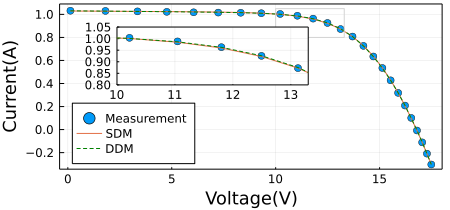

In [14]:
p_PW = plot(data_PW[:, 1], data_PW[:, 2]; st=:scatter, label="Measurement", size=(450, 210),
    guidefontsize=12, legendfontsize=8);
plot!(p_PW, data_PW[:, 1], I_PW_SDM; label="SDM")
plot!(p_PW, data_PW[:, 1], I_PW_DDM; label="DDM", linestyle=:dash, linecolor=:green)
plot!(p_PW; legend=:bottomleft, xlabel="Voltage(V)", ylabel="Current(A)", framestyle=:box, 
    topmargin=-1mm, bottommargin=2mm, rightmargin=0mm)
lens!(p_PW, [10, 13.3], [0.8, 1.05], inset=(1, bbox(0.15, 0.14, 0.5, 0.35)), framestyle=:box)
savefig(p_PW, joinpath(img_dir, "BB_PW.pdf"))
p_PW